# Churchland Widefield Data

This notebook demonstrates:
- Running a ARHMM on PCA-transformed neural data
- Neural data is transformed with PCA over each brain region

In [1]:
# Import statements
import numpy as np
import pandas as pd
import ssm
import seaborn as sns
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy.linalg as la
from collections import OrderedDict
from matplotlib.font_manager import FontProperties
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from ssm import LDS
from Session import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import ssm
from ssm import HMM
from ssm.util import find_permutation

In [2]:
from matplotlib.cm import get_cmap
cmap = get_cmap('coolwarm')

## 0. Specify the mouse and session date you are looking at

In [51]:
mouse = "mSM36"
day = "05-Dec-2017"

## 1. Load data and region indices

In [52]:
# Load the data into SESSION, NEUR_DATA, NEUR_DATA_EXCERPT

# Sesion, and full neural data
session = Session("vistrained", mouse, day)
neur_data = session.neural['neural']
delay_period_indices = session.get_delay_period(include_stim=True)

# Taking the 120-frame excerpt
excerpt_indices = []
for trial in range(delay_period_indices.shape[0]):
    start = delay_period_indices[trial,:][0] - 30
    end = delay_period_indices[trial,:][0] + 90
    excerpt_indices.append([start, end])
trial_choices = session.trialmarkers['ResponseSide']
neur_data_excerpt = []
for trial in range(neur_data.shape[0]):
    indices = excerpt_indices[trial]
    neur_data_excerpt.append(
        neur_data[trial,indices[0]:indices[1],:]
        )
neur_data_excerpt = np.array(neur_data_excerpt)
neur_data_excerpt_copy = neur_data_excerpt.copy()

In [ ]:
# Load the neural region indices: REG_INDXS, REG_NAMES
reg_indxs = session.neural['reg_indxs_consolidate'].item()
reg_names = session.neural['reg_indxs_consolidate'].dtype.names

## 2. Load ARHMMs

In [53]:
K = '16'
version = '40'

In [54]:
arhmm_path = "/home/chingf/engram/analysis/behavenet/musall/vistrained/" +\
    mouse + "/multisession-00/arhmm/09_latents/" + K + "_states/0e+00_kappa/" +\
    "gaussian/grid_search/version_" + version + "/"
pkl_file = "musall_vistrained_" + mouse + "_" + day + "_states.pkl"

In [55]:
with open(arhmm_path + pkl_file, "rb") as f:
    arhmm = pickle.load(f)
states = np.array(arhmm['states'])
trials = np.array(arhmm['trials'])

## 6. Plot the inferred states

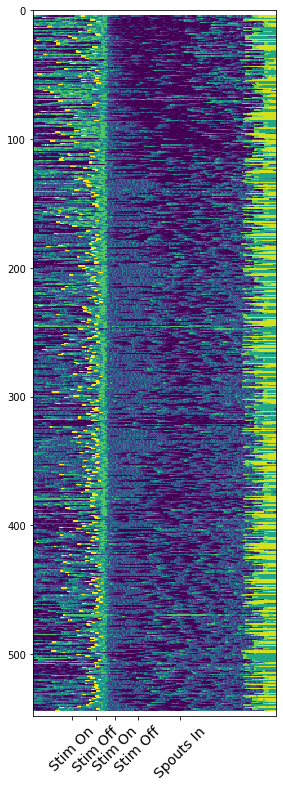

In [56]:
trial_states = []
for trial in range(session.num_trials):
    s = states[trial,:]
    trial_states.append(s)
trial_states = np.array(trial_states)
plt.figure(figsize=(15,13))
plt.imshow(trial_states)
plt.xticks(
    ticks=[30, 30+18, 30+33, 30+51, 30+84],
    labels=['Stim On', 'Stim Off', 'Stim On', 'Stim Off', 'Spouts In'],
    rotation=45, fontsize=14
    )
plt.show()

## 7. Plot inferred states for L/R choices

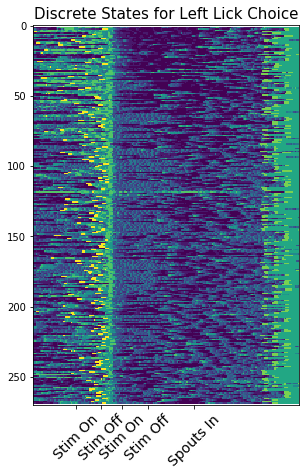

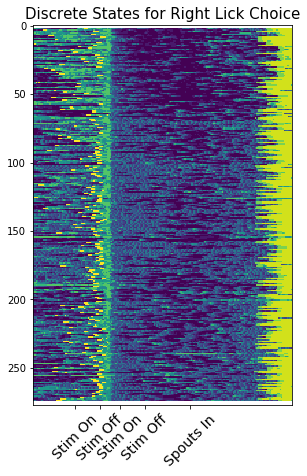

In [57]:
# Plot states for left or right lick choice
l_states = []
r_states = []
for trial, choice in enumerate(trial_choices):
    s = states[trial,:]
    if choice == 1:
        l_states.append(s)
    else:
        r_states.append(s)
l_states = np.array(l_states)
r_states = np.array(r_states)

plt.figure(figsize=(10,7))
plt.imshow(l_states)
plt.xticks(
    ticks=[30, 30+18, 30+33, 30+51, 30+84],
    labels=['Stim On', 'Stim Off', 'Stim On', 'Stim Off', 'Spouts In'],
    rotation=45, fontsize=14
    )
plt.title("Discrete States for Left Lick Choice", fontsize=15)
plt.show()

plt.figure(figsize=(10,7))
plt.imshow(r_states)
plt.xticks(
    ticks=[30, 30+18, 30+33, 30+51, 30+84],
    labels=['Stim On', 'Stim Off', 'Stim On', 'Stim Off', 'Spouts In'],
    rotation=45, fontsize=14
    )
plt.title("Discrete States for Right Lick Choice", fontsize=15)
plt.show()

## 8. Plot inferred states for correct/incorrect trials

In [58]:
trial_correctchoice = session.trialmarkers['CorrectSide']

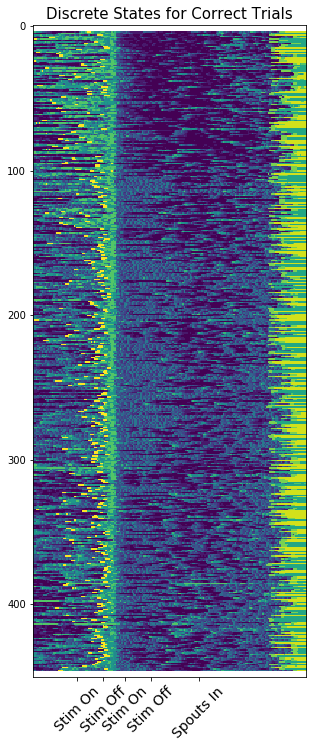

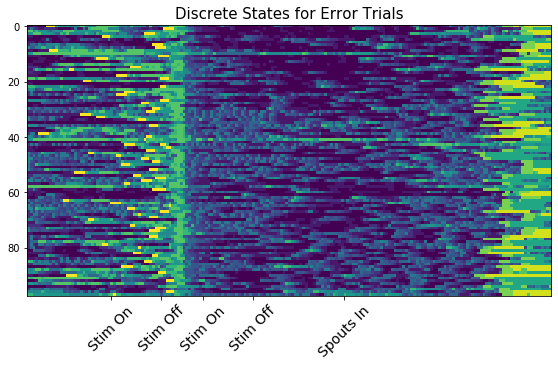

In [59]:
# Plot the states, separating by correctness of choice
correct_states = []
error_states = []
for trial, choice in enumerate(trial_choices):
    correctchoice = trial_correctchoice[trial]
    s = states[trial,:]
    if choice == correctchoice:
        correct_states.append(s)
    else:
        error_states.append(s)
correct_states = np.array(correct_states)
error_states = np.array(error_states)

plt.figure(figsize=(15,12))
plt.imshow(correct_states)
plt.xticks(
    ticks=[30, 30+18, 30+33, 30+51, 30+84],
    labels=['Stim On', 'Stim Off', 'Stim On', 'Stim Off', 'Spouts In'],
    rotation=45, fontsize=14
    )
plt.title("Discrete States for Correct Trials", fontsize=15)
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(error_states)
plt.xticks(
    ticks=[30, 30+18, 30+33, 30+51, 30+84],
    labels=['Stim On', 'Stim Off', 'Stim On', 'Stim Off', 'Spouts In'],
    rotation=45, fontsize=14
    )
plt.title("Discrete States for Error Trials", fontsize=15)
plt.show()